Import dependencies

In [1]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

Generate sample dataset

In [12]:
features, labels = make_circles(n_samples=100, noise=0.1, factor=0.2, random_state=123)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
print(features)
print(labels)

[[ 0.58267071  0.76121243]
 [-0.04558299  0.00783675]
 [-0.33979483 -0.05012994]
 [-0.97011309 -0.38072751]
 [-0.09630978  0.03900907]
 [ 1.12552374 -0.0688869 ]
 [ 0.97511224  0.66851607]
 [ 0.16852419 -0.10859024]
 [-0.21903992 -0.25816173]
 [ 1.08501802  0.4981978 ]
 [-0.85356261  0.12195468]
 [-0.04369989  0.3079975 ]
 [-0.23192402  0.0780448 ]
 [-0.04665339  0.05386415]
 [-0.95417464  0.08741559]
 [ 0.60003226 -1.04211672]
 [-0.12249017  0.21009242]
 [ 0.06032792 -0.99461252]
 [ 0.16374867 -0.04928815]
 [-0.15738534 -0.16054097]
 [-0.35178495 -0.82676956]
 [-0.06096359 -0.14948045]
 [-0.62769472  0.71242119]
 [-1.01340153 -0.5150012 ]
 [-0.53302749 -0.88705168]
 [ 0.05757726 -0.23617622]
 [-0.04972866 -0.11538974]
 [ 0.58664839  0.87780381]
 [ 0.26718943  0.12359893]
 [ 0.47321402 -0.96121945]
 [-0.97603883  0.37174936]
 [-0.01384032 -0.15804265]
 [-0.45973186 -0.81198104]
 [-0.20068924  0.31750643]
 [ 0.0667307  -0.21636542]
 [-0.09490124 -0.18658385]
 [ 0.28853326 -0.08428055]
 

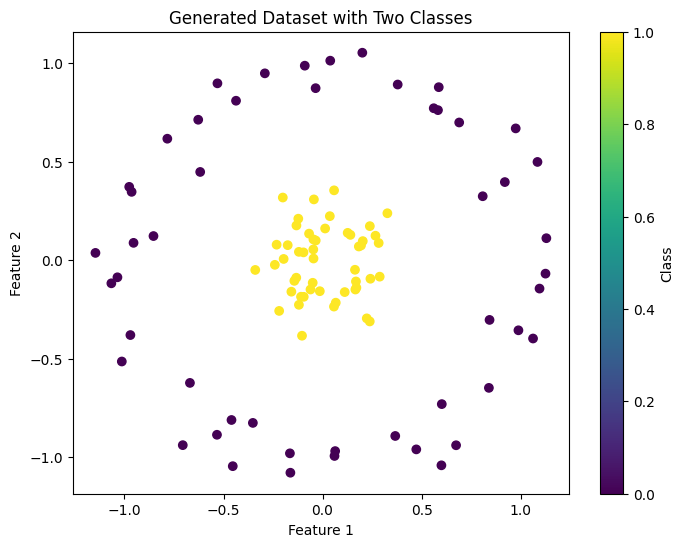

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Generated Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

 Normalize the data

In [4]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

Setup the quantum feature map

In [5]:
feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement='linear')

Setup the quantum kernel

In [6]:
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)


Create kernel matrix


In [7]:
kernel_matrix_train = quantum_kernel.evaluate(x_vec=train_features)
kernel_matrix_test = quantum_kernel.evaluate(x_vec=test_features, y_vec=train_features)


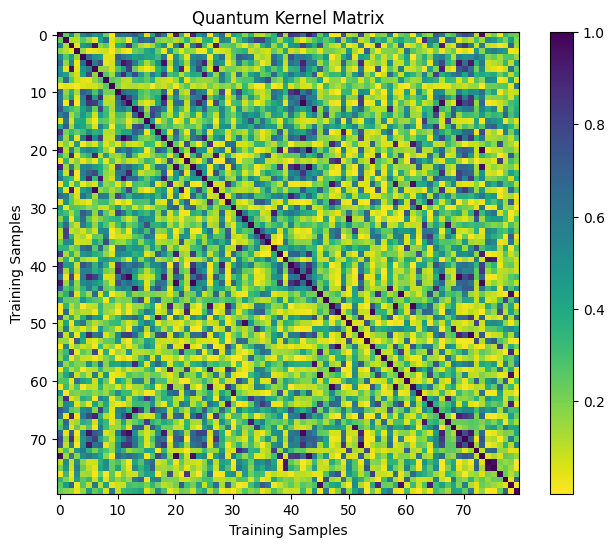

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(kernel_matrix_train, interpolation='nearest', origin='upper', cmap='viridis_r')
plt.title('Quantum Kernel Matrix')
plt.colorbar()
plt.xlabel('Training Samples')
plt.ylabel('Training Samples')
plt.show()


Train the SVM classifier

In [9]:

svc = SVC(kernel='precomputed')
svc.fit(kernel_matrix_train, train_labels)

SVC(kernel='precomputed')

Test the classifier

In [10]:
score = svc.score(kernel_matrix_test, test_labels)
print(f"Classification accuracy: {score * 100}%")

Classification accuracy: 85.0%


Visualization of decision boundaries

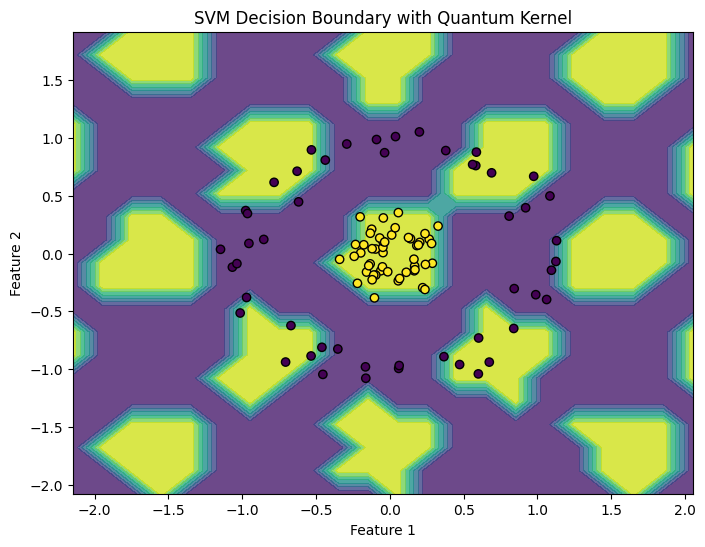

In [11]:
# Create a mesh to plot in
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

# Transform grid using the same scaler
grid_features = scaler.transform(np.c_[xx.ravel(), yy.ravel()])

# Calculate the kernel matrix for the grid features
grid_kernel_matrix = quantum_kernel.evaluate(x_vec=grid_features, y_vec=train_features)

# Predict each point on the grid
Z = svc.predict(grid_kernel_matrix)
Z = Z.reshape(xx.shape)

# Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.title('SVM Decision Boundary with Quantum Kernel')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()